# Volleyball Player Dataset Analysis 🏐

This notebook performs data analysis on a Kaggle Volleyball dataset. The goal is to extract meaningful insights using:
- Basic functions
- Data cleaning
- Data filtering and sorting
- Data aggregation
- Data visualizations


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os


## Unzip and Load Dataset
We will unzip the dataset and read the CSV file into a DataFrame.


In [ ]:
# Extract the zip file
zip_path = "/content/archive (1).zip"
extract_to = "/mnt/data/volleyball_project"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

# Display files
os.listdir(extract_to)

# Read the CSV file
for file in os.listdir(extract_to):
    if file.endswith(".csv"):
        file_path = os.path.join(extract_to, file)
        df = pd.read_csv(file_path)
        break

df.head()


,MATCHID,TEAM1,TEAM2,SCORES,SETSCORES,ATTACKS1,ATTACKS2,BLOCKS1,BLOCKS2,SERVES1,...,OPPONENT_ERRORS1,OPPONENT_ERRORS2,TOTAL1,TOTAL2,DIGS1,DIGS2,RECEPTION1,RECEPTION2,SETS1,SETS2
0,11700,France,Bulgaria,3\n:\n0,27-25\n25-21\n25-23,39,36,7,5,4,...,27,24,77,69,13,11,54,56,74,78
1,11701,Germany,Australia,3\n:\n0,25-19\n25-18\n25-16,42,28,5,3,5,...,23,22,75,53,34,26,40,53,71,60
2,11702,Japan,Iran,3\n:\n0,25-19\n25-22\n26-24,45,41,7,8,2,...,22,15,76,65,11,6,50,68,94,85
3,11703,Serbia,Slovenia,3\n:\n1,22-25\n25-18\n36-34\n25-18,66,53,14,9,3,...,25,29,108,95,46,59,79,88,119,110
4,11704,Netherlands,Russia,1\n:\n3,19-25\n22-25\n25-18\n20-25,49,51,6,10,6,...,25,22,86,93,47,49,74,69,88,88


## Basic Data Exploration (1–5)
We begin with basic inspection functions to understand the structure of the dataset.


In [31]:
# 1. Shape
print("Shape:", df.shape)

# 2. Column Names
print("Columns:", df.columns.tolist())

# 3. Data Types
print("\nData Types:\n", df.dtypes)

# 4. Info
df.info()

# 5. Describe
df.describe()


Shape: (224, 22)
Columns: ['MATCHID', 'TEAM1', 'TEAM2', 'SCORES', 'SETSCORES', 'ATTACKS1', 'ATTACKS2', 'BLOCKS1', 'BLOCKS2', 'SERVES1', 'SERVES2', 'OPPONENT_ERRORS1', 'OPPONENT_ERRORS2', 'TOTAL1', 'TOTAL2', 'DIGS1', 'DIGS2', 'RECEPTION1', 'RECEPTION2', 'SETS1', 'SETS2', 'TOTAL_COMBINED']

Data Types:
 MATCHID              int64
TEAM1               object
TEAM2               object
SCORES              object
SETSCORES           object
ATTACKS1             int64
ATTACKS2             int64
BLOCKS1              int64
BLOCKS2              int64
SERVES1              int64
SERVES2              int64
OPPONENT_ERRORS1     int64
OPPONENT_ERRORS2     int64
TOTAL1               int64
TOTAL2               int64
DIGS1                int64
DIGS2                int64
RECEPTION1           int64
RECEPTION2           int64
SETS1                int64
SETS2                int64
TOTAL_COMBINED       int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (tot

,MATCHID,ATTACKS1,ATTACKS2,BLOCKS1,BLOCKS2,SERVES1,SERVES2,OPPONENT_ERRORS1,OPPONENT_ERRORS2,TOTAL1,TOTAL2,DIGS1,DIGS2,RECEPTION1,RECEPTION2,SETS1,SETS2,TOTAL_COMBINED
count,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000
mean,12635.611607,46.544643,45.816964,7.196429,7.437500,4.687500,4.714286,24.044643,24.241071,82.473214,82.209821,45.781250,45.022321,66.665179,66.892857,92.468750,91.334821,164.683036
std,967.824196,11.272721,11.155142,3.541780,3.304519,2.723527,2.794705,6.343512,6.228454,18.147853,17.874643,16.963993,16.900247,15.001627,15.471285,21.685252,22.335586,32.954140
min,11700.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11755.750000,38.750000,37.000000,5.000000,5.000000,3.000000,3.000000,20.000000,20.000000,75.000000,75.000000,36.000000,33.000000,57.000000,57.000000,76.750000,75.750000,135.750000
50%,11811.500000,47.000000,46.000000,7.000000,7.000000,4.000000,5.000000,24.000000,23.500000,81.000000,81.000000,46.000000,46.500000,66.000000,66.000000,92.000000,88.000000,173.500000
75%,13695.250000,55.000000,54.000000,9.000000,9.000000,6.000000,6.000000,28.000000,28.250000,97.000000,97.000000,57.000000,56.000000,79.000000,79.000000,107.000000,108.000000,188.000000
max,13751.000000,70.000000,75.000000,19.000000,18.000000,17.000000,14.000000,44.000000,41.000000,117.000000,119.000000,95.000000,92.000000,102.000000,97.000000,145.000000,145.000000,235.000000


## Continue Basic Exploration (6–10)


In [ ]:
# 6. First 5 Rows
df.head()

# 7. Last 5 Rows
df.tail()

# 8. Unique values in 'Position' (if exists)
if 'Position' in df.columns:
    print(df['Position'].unique())

# 9. Value Counts (e.g., for Position)
if 'Position' in df.columns:
    print(df['Position'].value_counts())

# 10. Sample Random Rows
df.sample(5)


,MATCHID,TEAM1,TEAM2,SCORES,SETSCORES,ATTACKS1,ATTACKS2,BLOCKS1,BLOCKS2,SERVES1,...,OPPONENT_ERRORS1,OPPONENT_ERRORS2,TOTAL1,TOTAL2,DIGS1,DIGS2,RECEPTION1,RECEPTION2,SETS1,SETS2
198,13726,Bulgaria,Slovenia,1\n:\n3,22-25\n25-22\n18-25\n16-25,45,53,9,10,4,...,23,31,81,97,13,27,83,64,99,94
219,13747,Italy,Netherlands,3\n:\n1,21-25\n25-22\n25-13\n25-22,47,52,12,4,7,...,30,20,96,82,51,53,63,88,95,122
141,13668,Bulgaria,Germany,2\n:\n3,20-25\n25-22\n16-25\n25-20\n10-15,58,61,10,13,2,...,26,28,96,107,47,63,91,78,107,111
107,11807,Iran,Poland,0\n:\n3,20-25\n20-25\n16-25,27,31,5,11,3,...,21,27,56,75,41,38,66,43,89,68
68,11768,Australia,Italy,0\n:\n3,20-25\n22-25\n14-25,33,44,4,5,1,...,18,23,56,75,45,47,59,47,85,77


## Final Basic Functions (11–15)


In [ ]:
# Null values
df.isnull().sum()

,0
MATCHID,0
TEAM1,0
TEAM2,0
SCORES,0
SETSCORES,0
ATTACKS1,0
ATTACKS2,0
BLOCKS1,0
BLOCKS2,0
SERVES1,0


In [ ]:
#  Check for duplicates
df.duplicated().sum()


np.int64(0)

In [ ]:
#  Check for zero or negative values
(df.select_dtypes(include=np.number) <= 0).sum()


,0
MATCHID,0
ATTACKS1,1
ATTACKS2,1
BLOCKS1,2
BLOCKS2,1
SERVES1,7
SERVES2,8
OPPONENT_ERRORS1,1
OPPONENT_ERRORS2,1
TOTAL1,1


In [ ]:
#  Correlation matrix
df.corr(numeric_only=True)

,MATCHID,ATTACKS1,ATTACKS2,BLOCKS1,BLOCKS2,SERVES1,SERVES2,OPPONENT_ERRORS1,OPPONENT_ERRORS2,TOTAL1,TOTAL2,DIGS1,DIGS2,RECEPTION1,RECEPTION2,SETS1,SETS2
MATCHID,1.000000,-0.062485,-0.042126,-0.076500,-0.144630,0.024887,0.093958,0.006408,-0.069244,-0.047769,-0.062466,-0.166159,-0.184823,-0.064289,-0.038524,-0.110858,-0.064582
ATTACKS1,-0.062485,1.000000,0.675107,0.407040,0.282850,0.370429,-0.062223,0.476066,0.517947,0.922598,0.644360,0.585252,0.508126,0.676132,0.899185,0.749106,0.744612
ATTACKS2,-0.042126,0.675107,1.000000,0.267073,0.405208,0.109400,0.268593,0.582051,0.480698,0.691344,0.908483,0.540480,0.604670,0.876608,0.720402,0.739676,0.766077
BLOCKS1,-0.076500,0.407040,0.267073,1.000000,0.006801,0.220702,-0.097145,0.215567,0.202546,0.556472,0.223320,0.202309,0.302217,0.257393,0.561539,0.308826,0.489159
BLOCKS2,-0.144630,0.282850,0.405208,0.006801,1.000000,-0.000187,0.225790,0.322088,0.310335,0.289579,0.581192,0.320732,0.248260,0.570142,0.293617,0.460892,0.278396
SERVES1,0.024887,0.370429,0.109400,0.220702,-0.000187,1.000000,-0.097210,0.138636,0.098306,0.471703,0.087295,0.101105,0.039220,0.101915,0.458525,0.152448,0.155280
SERVES2,0.093958,-0.062223,0.268593,-0.097145,0.225790,-0.097210,1.000000,0.233940,0.206206,0.009574,0.437568,0.066778,0.135810,0.404262,0.004163,0.144806,0.126468
OPPONENT_ERRORS1,0.006408,0.476066,0.582051,0.215567,0.322088,0.138636,0.233940,1.000000,0.462000,0.708136,0.620351,0.476769,0.431159,0.473879,0.674644,0.527067,0.651147
OPPONENT_ERRORS2,-0.069244,0.517947,0.480698,0.202546,0.310335,0.098306,0.206206,0.462000,1.000000,0.537501,0.738057,0.423088,0.456847,0.725752,0.400897,0.615834,0.506333
TOTAL1,-0.047769,0.922598,0.691344,0.556472,0.289579,0.471703,0.009574,0.708136,0.537501,1.000000,0.673777,0.584844,0.531205,0.651157,0.972761,0.732698,0.808898


In [ ]:
#  Columns with low variance
df.nunique()

,0
MATCHID,224
TEAM1,17
TEAM2,17
SCORES,6
SETSCORES,222
ATTACKS1,48
ATTACKS2,47
BLOCKS1,19
BLOCKS2,19
SERVES1,16


## Data Cleaning 🧹
Clean and prepare the dataset for deeper analysis.


In [ ]:
# 1. Drop Duplicates
df.drop_duplicates(inplace=True)

# 2. Fill Missing Numeric with Median
df.fillna(df.median(numeric_only=True), inplace=True)

# 3. Convert height/weight columns to numeric (if needed)
if 'Height' in df.columns:
    df['Height'] = pd.to_numeric(df['Height'], errors='coerce')


## Data Filtering 🔍
Filter dataset for insights.


In [ ]:
# List actual column names to debug the issue
print("Actual columns in dataset:")
print(df.columns.tolist())


Actual columns in dataset:
['MATCHID', 'TEAM1', 'TEAM2', 'SCORES', 'SETSCORES', 'ATTACKS1', 'ATTACKS2', 'BLOCKS1', 'BLOCKS2', 'SERVES1', 'SERVES2', 'OPPONENT_ERRORS1', 'OPPONENT_ERRORS2', 'TOTAL1', 'TOTAL2', 'DIGS1', 'DIGS2', 'RECEPTION1', 'RECEPTION2', 'SETS1', 'SETS2']


In [ ]:
# 1. Matches where TEAM1 scored more than 100 total points
high_scoring_team1 = df[df['TOTAL1'] > 100]
print("Matches where TEAM1 scored > 100:")
display(high_scoring_team1.head())

Matches where TEAM1 scored > 100:


,MATCHID,TEAM1,TEAM2,SCORES,SETSCORES,ATTACKS1,ATTACKS2,BLOCKS1,BLOCKS2,SERVES1,...,OPPONENT_ERRORS2,TOTAL1,TOTAL2,DIGS1,DIGS2,RECEPTION1,RECEPTION2,SETS1,SETS2,TOTAL_COMBINED
3,11703,Serbia,Slovenia,3\n:\n1,22-25\n25-18\n36-34\n25-18,66,53,14,9,3,...,29,108,95,46,59,79,88,119,110,203
8,11708,Germany,France,2\n:\n3,25-22\n22-25\n25-22\n16-25\n15-17,62,63,12,11,5,...,32,103,111,49,58,91,81,47,43,214
18,11718,Germany,Bulgaria,3\n:\n2,19-25\n25-21\n22-25\n30-28\n15-11,53,55,12,14,9,...,31,111,110,68,57,87,88,119,121,221
19,11719,Russia,Japan,2\n:\n3,26-28\n28-26\n25-20\n21-25\n14-16,65,75,18,7,7,...,30,114,115,60,92,93,97,123,137,229
24,11724,Germany,Argentina,2\n:\n3,19-25\n25-23\n25-17\n23-25\n13-15,56,70,9,8,4,...,25,105,105,54,68,79,87,112,132,210


In [ ]:
# 2. Matches where BLOCKS2 > 10 (strong defense by TEAM2)
strong_blocks_team2 = df[df['BLOCKS2'] > 10]
print("Matches where TEAM2 had > 10 blocks:")
display(strong_blocks_team2.head())

Matches where TEAM2 had > 10 blocks:


,MATCHID,TEAM1,TEAM2,SCORES,SETSCORES,ATTACKS1,ATTACKS2,BLOCKS1,BLOCKS2,SERVES1,...,OPPONENT_ERRORS2,TOTAL1,TOTAL2,DIGS1,DIGS2,RECEPTION1,RECEPTION2,SETS1,SETS2,TOTAL_COMBINED
7,11707,Brazil,Argentina,3\n:\n0,31-29\n26-24\n25-16,44,38,6,13,7,...,15,82,69,42,31,55,72,85,76,151
8,11708,Germany,France,2\n:\n3,25-22\n22-25\n25-22\n16-25\n15-17,62,63,12,11,5,...,32,103,111,49,58,91,81,47,43,214
18,11718,Germany,Bulgaria,3\n:\n2,19-25\n25-21\n22-25\n30-28\n15-11,53,55,12,14,9,...,31,111,110,68,57,87,88,119,121,221
26,11726,Japan,Serbia,1\n:\n3,25-18\n23-25\n22-25\n13-25,54,58,7,17,2,...,17,83,93,55,36,77,73,112,101,176
29,11729,Australia,Poland,0\n:\n3,16-25\n10-25\n12-25,20,31,1,13,1,...,20,38,75,17,26,62,29,68,52,113


In [ ]:
# 3. Matches where TEAM1 had more attacks than TEAM2
team1_more_attacks = df[df['ATTACKS1'] > df['ATTACKS2']]
print("Matches where TEAM1 had more attacks than TEAM2:")
display(team1_more_attacks.head())

Matches where TEAM1 had more attacks than TEAM2:


,MATCHID,TEAM1,TEAM2,SCORES,SETSCORES,ATTACKS1,ATTACKS2,BLOCKS1,BLOCKS2,SERVES1,...,OPPONENT_ERRORS2,TOTAL1,TOTAL2,DIGS1,DIGS2,RECEPTION1,RECEPTION2,SETS1,SETS2,TOTAL_COMBINED
0,11700,France,Bulgaria,3\n:\n0,27-25\n25-21\n25-23,39,36,7,5,4,...,24,77,69,13,11,54,56,74,78,146
1,11701,Germany,Australia,3\n:\n0,25-19\n25-18\n25-16,42,28,5,3,5,...,22,75,53,34,26,40,53,71,60,128
2,11702,Japan,Iran,3\n:\n0,25-19\n25-22\n26-24,45,41,7,8,2,...,15,76,65,11,6,50,68,94,85,141
3,11703,Serbia,Slovenia,3\n:\n1,22-25\n25-18\n36-34\n25-18,66,53,14,9,3,...,29,108,95,46,59,79,88,119,110,203
5,11705,United States,Canada,3\n:\n0,25-17\n26-24\n25-20,43,30,5,6,4,...,22,76,61,51,48,54,58,91,81,137


## Data Sorting 📊
We’ll sort the dataset to see the highest scorers and best defenders.


In [33]:
# Add combined total score column first
df['TOTAL_COMBINED'] = df['TOTAL1'] + df['TOTAL2']

In [34]:
# 1. Top 5 highest scores by TEAM1
top_team1_scores = df.sort_values('TOTAL1', ascending=False)
print("Top 5 matches by TOTAL1:")
display(top_team1_scores.head())


Top 5 matches by TOTAL1:


,MATCHID,TEAM1,TEAM2,SCORES,SETSCORES,ATTACKS1,ATTACKS2,BLOCKS1,BLOCKS2,SERVES1,...,OPPONENT_ERRORS2,TOTAL1,TOTAL2,DIGS1,DIGS2,RECEPTION1,RECEPTION2,SETS1,SETS2,TOTAL_COMBINED
101,11801,Slovenia,United States,3\n:\n2,28-30\n25-19\n21-25\n28-26\n15-13,69,61,11,10,4,...,36,117,113,66,67,91,92,131,129,230
146,13673,Germany,Serbia,3\n:\n2,27-25\n25-27\n18-25\n28-26\n18-16,60,71,16,9,9,...,29,116,119,81,80,102,96,141,138,235
19,11719,Russia,Japan,2\n:\n3,26-28\n28-26\n25-20\n21-25\n14-16,65,75,18,7,7,...,30,114,115,60,92,93,97,123,137,229
212,13740,United States,Argentina,3\n:\n2,29-27\n22-25\n20-25\n25-13\n17-15,65,66,13,7,3,...,30,113,105,66,66,81,92,115,130,218
56,11756,Serbia,Iran,3\n:\n2,21-25\n25-15\n26-28\n25-22\n15-8,65,51,12,8,9,...,32,112,98,71,50,82,91,116,106,210


In [35]:
# 2. Top 5 blocks by TEAM1
top_blocks_team1 = df.sort_values('BLOCKS1', ascending=False)
print("Top 5 matches by BLOCKS1:")
display(top_blocks_team1.head())


Top 5 matches by BLOCKS1:


,MATCHID,TEAM1,TEAM2,SCORES,SETSCORES,ATTACKS1,ATTACKS2,BLOCKS1,BLOCKS2,SERVES1,...,OPPONENT_ERRORS2,TOTAL1,TOTAL2,DIGS1,DIGS2,RECEPTION1,RECEPTION2,SETS1,SETS2,TOTAL_COMBINED
113,11813,Canada,Serbia,3\n:\n2,17-25\n21-25\n25-17\n25-20\n17-15,47,62,19,9,1,...,23,105,102,76,74,76,90,124,145,207
19,11719,Russia,Japan,2\n:\n3,26-28\n28-26\n25-20\n21-25\n14-16,65,75,18,7,7,...,30,114,115,60,92,93,97,123,137,229
146,13673,Germany,Serbia,3\n:\n2,27-25\n25-27\n18-25\n28-26\n18-16,60,71,16,9,9,...,29,116,119,81,80,102,96,141,138,235
57,11757,Russia,Canada,3\n:\n1,25-18\n25-18\n23-25\n25-23,51,44,15,5,6,...,28,98,84,37,53,68,78,99,102,182
117,11818,Italy,Germany,3\n:\n2,25-12\n24-26\n25-22\n21-25\n15-13,58,52,15,9,5,...,32,110,98,73,76,78,87,123,131,208


In [36]:
# 3. Top 5 matches by combined score
top_total_matches = df.sort_values('TOTAL_COMBINED', ascending=False)
print("Top 5 matches by TOTAL_COMBINED:")
display(top_total_matches.head())

Top 5 matches by TOTAL_COMBINED:


,MATCHID,TEAM1,TEAM2,SCORES,SETSCORES,ATTACKS1,ATTACKS2,BLOCKS1,BLOCKS2,SERVES1,...,OPPONENT_ERRORS2,TOTAL1,TOTAL2,DIGS1,DIGS2,RECEPTION1,RECEPTION2,SETS1,SETS2,TOTAL_COMBINED
146,13673,Germany,Serbia,3\n:\n2,27-25\n25-27\n18-25\n28-26\n18-16,60,71,16,9,9,...,29,116,119,81,80,102,96,141,138,235
101,11801,Slovenia,United States,3\n:\n2,28-30\n25-19\n21-25\n28-26\n15-13,69,61,11,10,4,...,36,117,113,66,67,91,92,131,129,230
19,11719,Russia,Japan,2\n:\n3,26-28\n28-26\n25-20\n21-25\n14-16,65,75,18,7,7,...,30,114,115,60,92,93,97,123,137,229
79,11779,Netherlands,France,3\n:\n2,15-25\n22-25\n28-26\n25-23\n19-17,64,73,6,12,7,...,25,109,116,70,73,93,93,132,128,225
18,11718,Germany,Bulgaria,3\n:\n2,19-25\n25-21\n22-25\n30-28\n15-11,53,55,12,14,9,...,31,111,110,68,57,87,88,119,121,221


## Data Aggregation 📈
Aggregate scores and attacks to summarize team performance.


In [38]:
# 1. Average TOTAL1 and TOTAL2
avg_total = df[['TOTAL1', 'TOTAL2']].mean()
print("Average TOTAL scores per side:")
print(avg_total)

Average TOTAL scores per side:
TOTAL1    82.473214
TOTAL2    82.209821
dtype: float64


In [40]:
# 2. Total attacks per team
total_attacks = {
    'Total ATTACKS1': df['ATTACKS1'].sum(),
    'Total ATTACKS2': df['ATTACKS2'].sum()
}
print("\nTotal attacks by team:")
print(total_attacks)


Total attacks by team:
{'Total ATTACKS1': np.int64(10426), 'Total ATTACKS2': np.int64(10263)}


In [41]:
# 3. Average DIGS per team
avg_digs = {
    'Average DIGS1': df['DIGS1'].mean(),
    'Average DIGS2': df['DIGS2'].mean()
}
print("\nAverage DIGS by team:")
print(avg_digs)


Average DIGS by team:
{'Average DIGS1': np.float64(45.78125), 'Average DIGS2': np.float64(45.02232142857143)}


## 1. Distribution of Total Scores by Team
Let's compare how often TEAM1 and TEAM2 achieved different total scores.


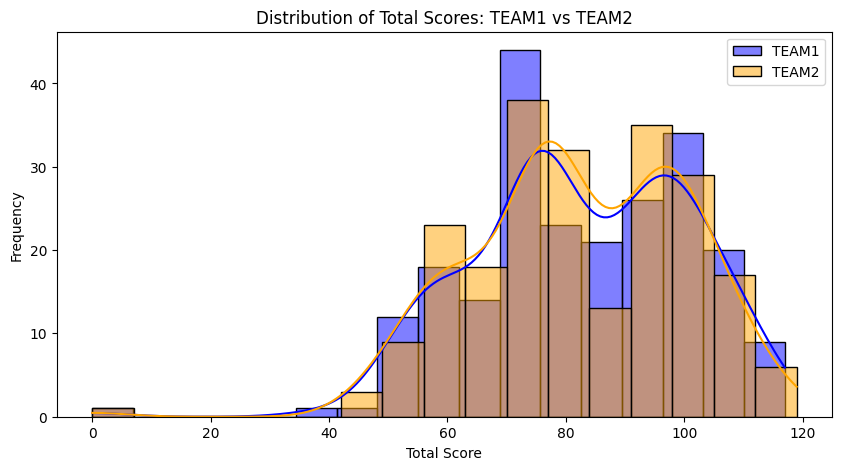

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(df['TOTAL1'], color='blue', label='TEAM1', kde=True)
sns.histplot(df['TOTAL2'], color='orange', label='TEAM2', kde=True)
plt.title('Distribution of Total Scores: TEAM1 vs TEAM2')
plt.xlabel('Total Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()


## 2. Boxplot of Attacks: TEAM1 vs TEAM2
Visualizing how attacks vary between both teams across all matches.


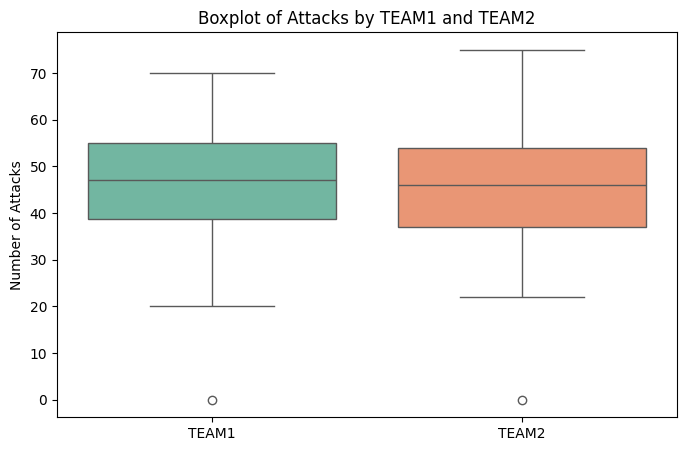

In [43]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df[['ATTACKS1', 'ATTACKS2']], palette='Set2')
plt.title('Boxplot of Attacks by TEAM1 and TEAM2')
plt.xticks([0, 1], ['TEAM1', 'TEAM2'])
plt.ylabel('Number of Attacks')
plt.show()


## 3. Correlation Heatmap
Shows correlation between numeric performance metrics.


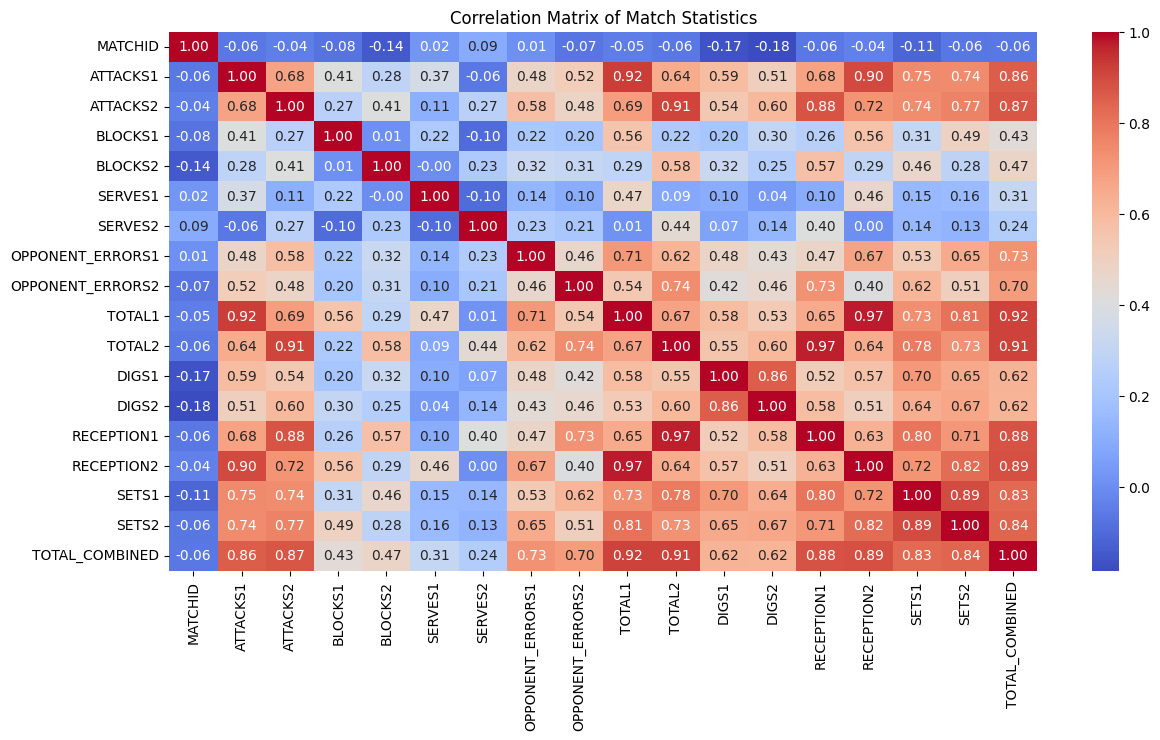

In [44]:
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Match Statistics')
plt.show()


## 4. Scatter Plot: Blocks vs Serves
Let's see if there’s a relationship between blocks and serves for both teams.


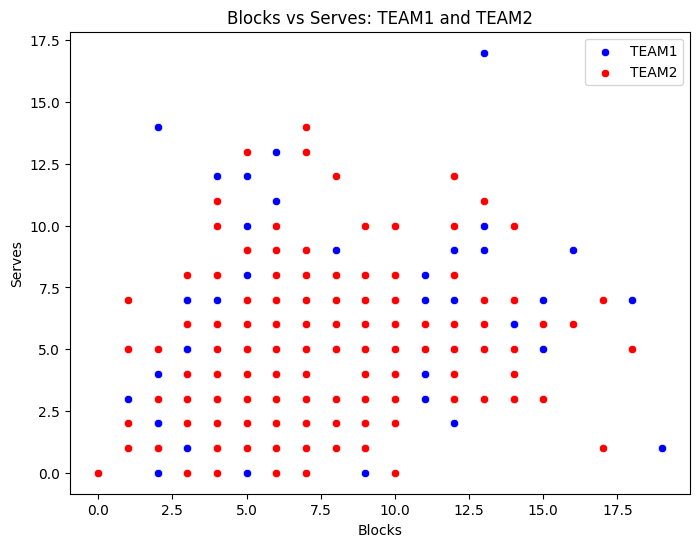

In [45]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='BLOCKS1', y='SERVES1', data=df, label='TEAM1', color='blue')
sns.scatterplot(x='BLOCKS2', y='SERVES2', data=df, label='TEAM2', color='red')
plt.title('Blocks vs Serves: TEAM1 and TEAM2')
plt.xlabel('Blocks')
plt.ylabel('Serves')
plt.legend()
plt.show()


## 5. Bar Plot: Top 10 Matches by Combined Score
Ranking the most intense matches with the highest total points scored.


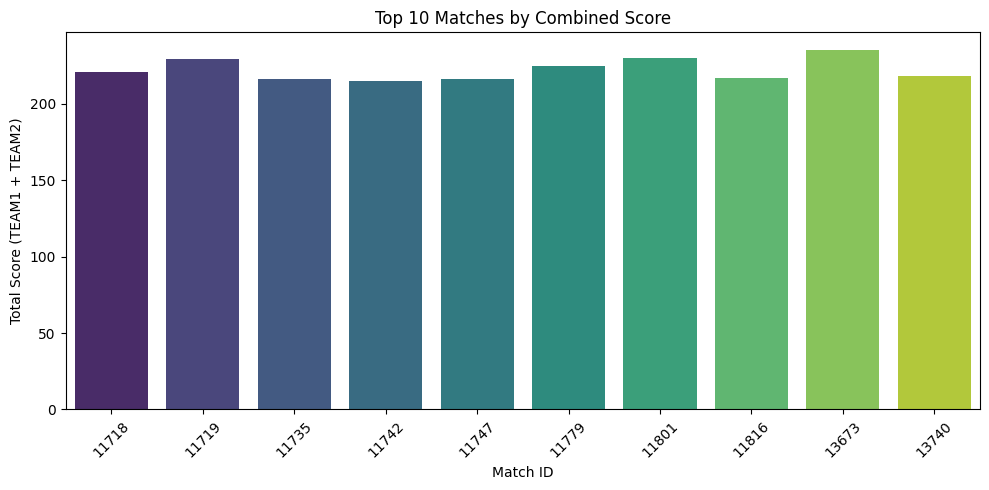

In [46]:
# Make sure combined score column exists
df['TOTAL_COMBINED'] = df['TOTAL1'] + df['TOTAL2']

top10 = df.sort_values('TOTAL_COMBINED', ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top10['MATCHID'], y=top10['TOTAL_COMBINED'], palette='viridis')
plt.title('Top 10 Matches by Combined Score')
plt.ylabel('Total Score (TEAM1 + TEAM2)')
plt.xlabel('Match ID')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
